In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [32]:
df = pd.read_csv('data.csv')

C:\Users\valer\AppData\Local\Temp\ipykernel_5028\1507164070.py:1: DtypeWarning: Columns (7,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data.csv')


The first step in analyzing the data is to inspect the columns, the number of non-null values, and the data types of each column. This helps to get an overview of the dataset and understand its structure. 

In [33]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3552912 entries, 0 to 3552911
Data columns (total 16 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   maker                3033997 non-null  object 
 1   model                2419551 non-null  object 
 2   mileage              3190328 non-null  float64
 3   manufacture_year     3182334 non-null  float64
 4   engine_displacement  2809498 non-null  float64
 5   engine_power         2998035 non-null  float64
 6   body_type            2429998 non-null  object 
 7   color_slug           209501 non-null   object 
 8   stk_year             536105 non-null   float64
 9   transmission         2811282 non-null  object 
 10  door_count           2462846 non-null  float64
 11  seat_count           2265813 non-null  float64
 12  fuel_type            1705306 non-null  object 
 13  date_created         3552912 non-null  object 
 14  date_last_seen       3552912 non-null  object 
 15

 It is clear that the dataset contains a large number of rows, many of which have missing values. Additionally, there are several non-numeric columns, which will require encoding or transformation to be usable in machine learning models.

By plotting the distribution of the price, we observe that the majority of the data points are concentrated in the first bin. 

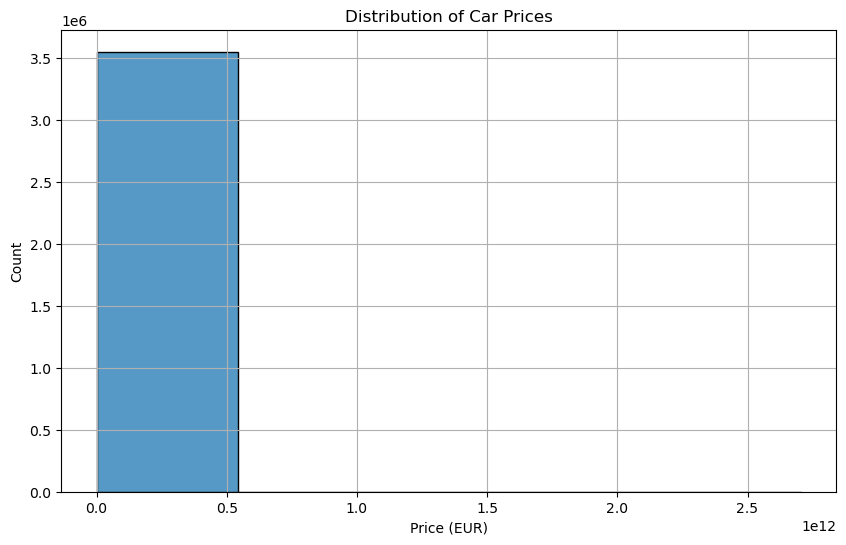

In [34]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price_eur'], bins=5)
plt.title("Distribution of Car Prices")
plt.xlabel("Price (EUR)")
plt.ylabel("Count")
plt.grid(True)
plt.show()

The concentration of values in the price distribution is so high that it becomes difficult to understand the underlying structure from the plot alone. To better understand the data, I decided to bin the price values into ranges. Upon inspecting the price bins, it becomes evident that the maximum price in the dataset is unrealistic, and the minimum price is also far below plausible values. This observation indicates potential data entry issues.

In [35]:
num_bins = 5

min_price = df['price_eur'].min()
max_price = df['price_eur'].max()

bins = np.linspace(min_price, max_price, num_bins + 1)

df['price_range'] = pd.cut(df['price_eur'], bins=bins, include_lowest=True)

price_counts = df['price_range'].value_counts().sort_index()

for bin_range, count in price_counts.items():
    print(f"Number of cars in the price range {bin_range}: {count}")

df = df.drop('price_range', axis = 1)

Number of cars in the price range (0.039, 541229810612.912]: 3552910
Number of cars in the price range (541229810612.912, 1082459621225.784]: 0
Number of cars in the price range (1082459621225.784, 1623689431838.656]: 0
Number of cars in the price range (1623689431838.656, 2164919242451.528]: 0
Number of cars in the price range (2164919242451.528, 2706149053064.4]: 2


I searched the most expensive and the cheapest price cars. With a Google Search, it is obvious, that it is impossible for this cars to have such a price and it is just human error.

In [36]:
cheapest_car = df.loc[df['price_eur'].idxmin()]

print("--- Cheapest Car ---")
print(cheapest_car)

--- Cheapest Car ---
maker                                          fiat
model                                         stilo
mileage                                    125000.0
manufacture_year                                NaN
engine_displacement                          1816.0
engine_power                                   98.0
body_type                                   compact
color_slug                                      NaN
stk_year                                        NaN
transmission                                    NaN
door_count                                      NaN
seat_count                                      NaN
fuel_type                                  gasoline
date_created           2015-11-14 20:09:37.15122+00
date_last_seen         2016-01-27 20:40:15.46361+00
price_eur                                      0.04
Name: 10311, dtype: object


In [37]:
most_expensive_car = df.loc[df['price_eur'].idxmax()]
print("\n--- Most Expensive Car ---")
print(most_expensive_car)


--- Most Expensive Car ---
maker                                        renault
model                                         kangoo
mileage                                          NaN
manufacture_year                                 NaN
engine_displacement                              NaN
engine_power                                     NaN
body_type                                      other
color_slug                                       NaN
stk_year                                         NaN
transmission                                     NaN
door_count                                       NaN
seat_count                                       NaN
fuel_type                                        NaN
date_created           2016-02-25 03:12:30.336022+00
date_last_seen         2016-07-03 17:13:09.109904+00
price_eur                       2706149053064.399902
Name: 2046574, dtype: object


In [38]:
for col in df.columns:
    print(f"Column: {col}")
    print(df[col].unique())
    print("-" * 40)

Column: maker
['ford' 'skoda' 'bmw' nan 'suzuki' 'nissan' 'opel' 'citroen' 'seat' 'kia'
 'audi' 'rover' 'toyota' 'hyundai' 'fiat' 'volvo' 'chevrolet' 'mazda'
 'jeep' 'mercedes-benz' 'subaru' 'chrysler' 'lancia' 'smart' 'honda'
 'porsche' 'dodge' 'mitsubishi' 'mini' 'jaguar' 'lexus' 'hummer' 'bentley'
 'tesla' 'maserati' 'isuzu' 'lamborghini' 'lotus' 'volkswagen' 'peugeot'
 'renault' 'alfa-romeo' 'infinity' 'rolls-royce' 'aston-martin'
 'land-rover' 'dacia']
----------------------------------------
Column: model
['galaxy' 'octavia' nan ... '125d' 'glk200-cdi' '760i']
----------------------------------------
Column: mileage
[151000. 143476.  97676. ... 338019. 223881. 297431.]
----------------------------------------
Column: manufacture_year
[2011. 2012. 2010. ...  243.  575.  139.]
----------------------------------------
Column: engine_displacement
[2000. 1995. 1200. ... 6068. 2121. 9350.]
----------------------------------------
Column: engine_power
[1.030e+02 8.100e+01 8.500e+01 4.70

I observed that there are manufacture_year that are not realistic so i eliminated them.

In [40]:
df = df[(df['manufacture_year'] >= 1886) & (df['manufacture_year'] <= 2025)]


To better visualize the relationship between numerical car features and price, I filtered the dataset to include only cars priced below 500,000 euro, because the high variation caused by outliers made it hard to notice real patterns in the data.

Mileage, manufacture year, and engine displacement show a noticeable relationship with price:

 - Cars with higher prices tend to have lower mileage, be newer, and have a lower engine displacement.

Engine power, door count, and seat count did not show a clear correlation:

 - In these graphs, the points were heavily clustered together without a clear trend.

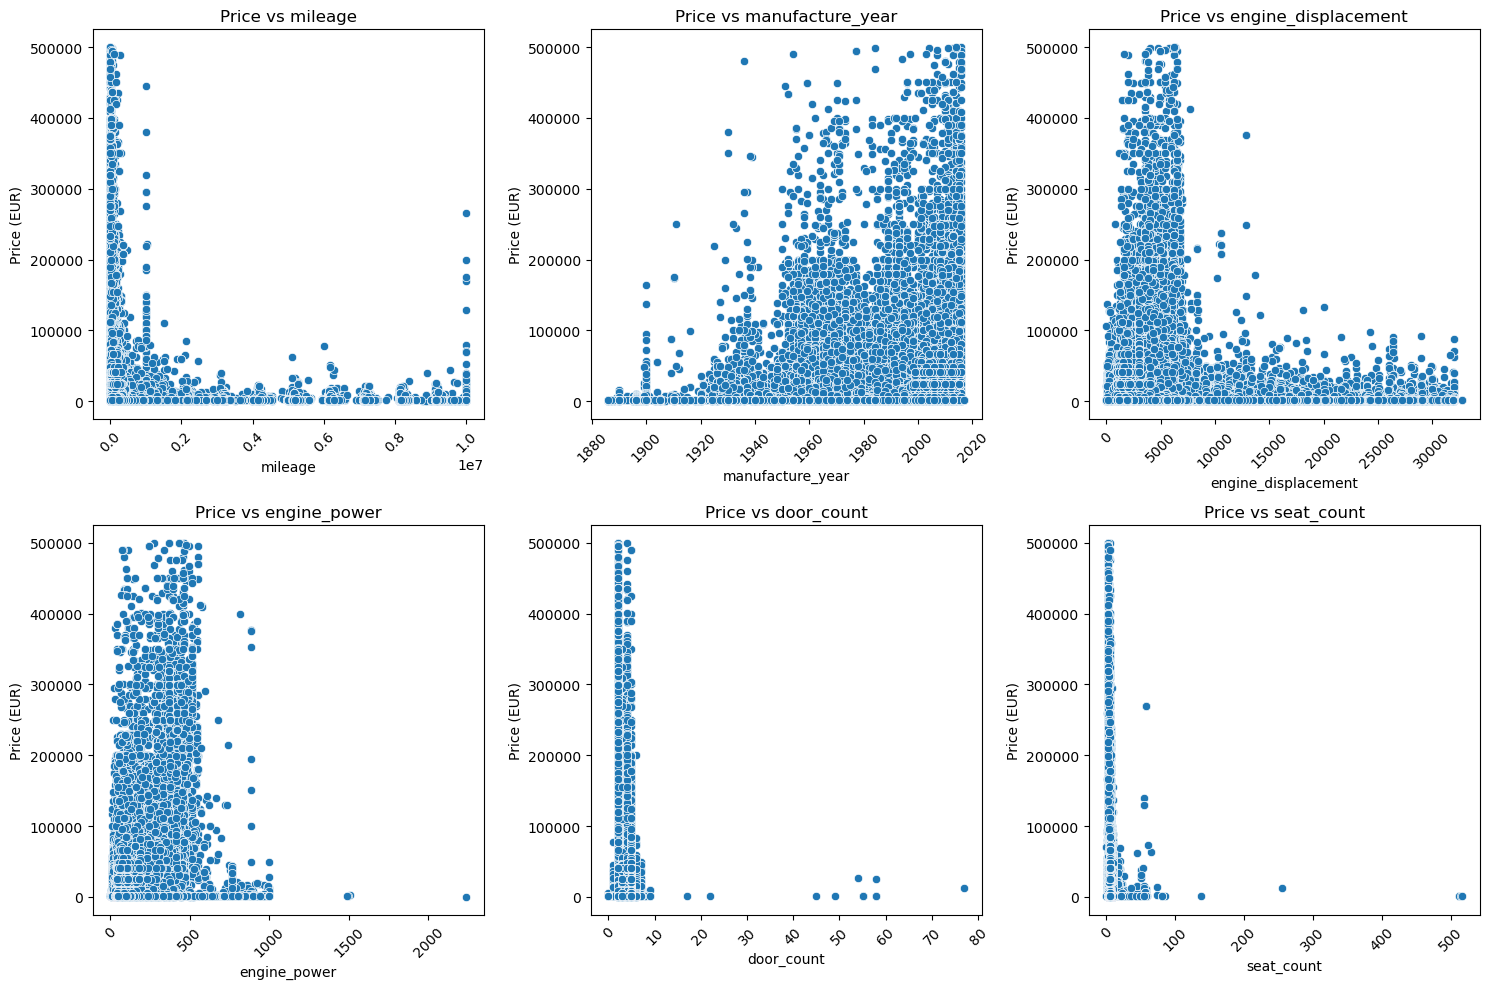

In [ ]:
df_filtered = df[df['price_eur'] < 500000]

numerical_cols = ['mileage', 'manufacture_year', 'engine_displacement', 
                  'engine_power', 'door_count', 'seat_count']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.scatterplot(x=df_filtered[col], y=df_filtered['price_eur'], ax=axes[i])
    axes[i].set_title(f'Price vs {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Price (EUR)')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


The initial scatter plot between engine power and price was too cluttered, making it difficult to identify any clear patterns.
To improve the analysis, I grouped engine power into intervals and calculated the average price for each group. This method highlights the relationship much better. Cars with higher engine power generally tend to have higher prices.

C:\Users\valer\AppData\Local\Temp\ipykernel_5028\701854733.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['engine_power_bin'] = pd.cut(df_filtered['engine_power'], bins=bins, labels=labels)


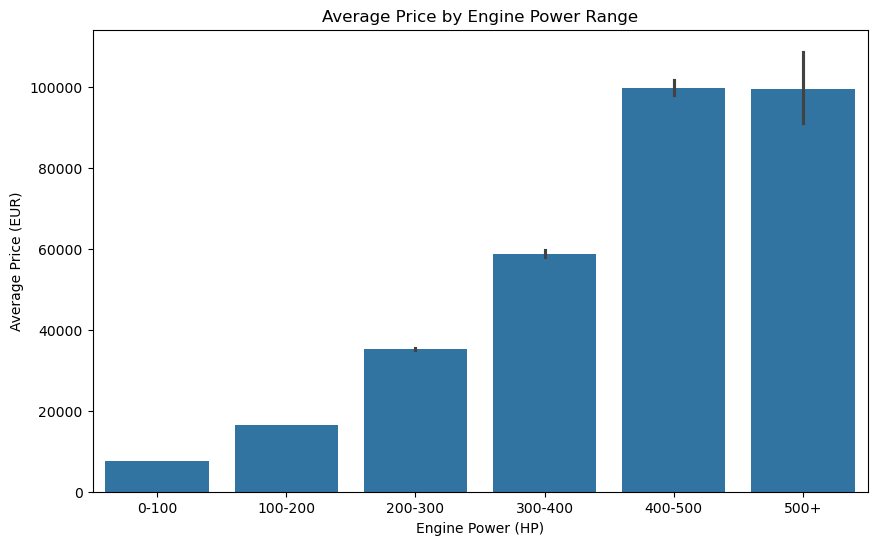

In [ ]:
bins = [0, 100, 200, 300, 400, 500, 1000]
labels = ['0-100', '100-200', '200-300', '300-400', '400-500', '500+']
df_filtered['engine_power_bin'] = pd.cut(df_filtered['engine_power'], bins=bins, labels=labels)

plt.figure(figsize=(10, 6))
sns.barplot(x='engine_power_bin', y='price_eur', data=df_filtered)
plt.title('Average Price by Engine Power Range')
plt.xlabel('Engine Power (HP)')
plt.ylabel('Average Price (EUR)')
plt.show()


In [51]:
df_filtered = df_filtered[(df_filtered['door_count'] >= 2) & (df_filtered['door_count'] <= 5)]
df_filtered = df_filtered[(df_filtered['seat_count'] >= 2) & (df_filtered['seat_count'] <= 9)]

After cleaning unrealistic values, I visualized the relationship between door count, seat count, and car price using box plots in a single figure.

The plots showed that the number of doors or seats does not have a strong influence on the price.
Prices are relatively spread out across all door and seat counts without any clear increasing or decreasing trend.

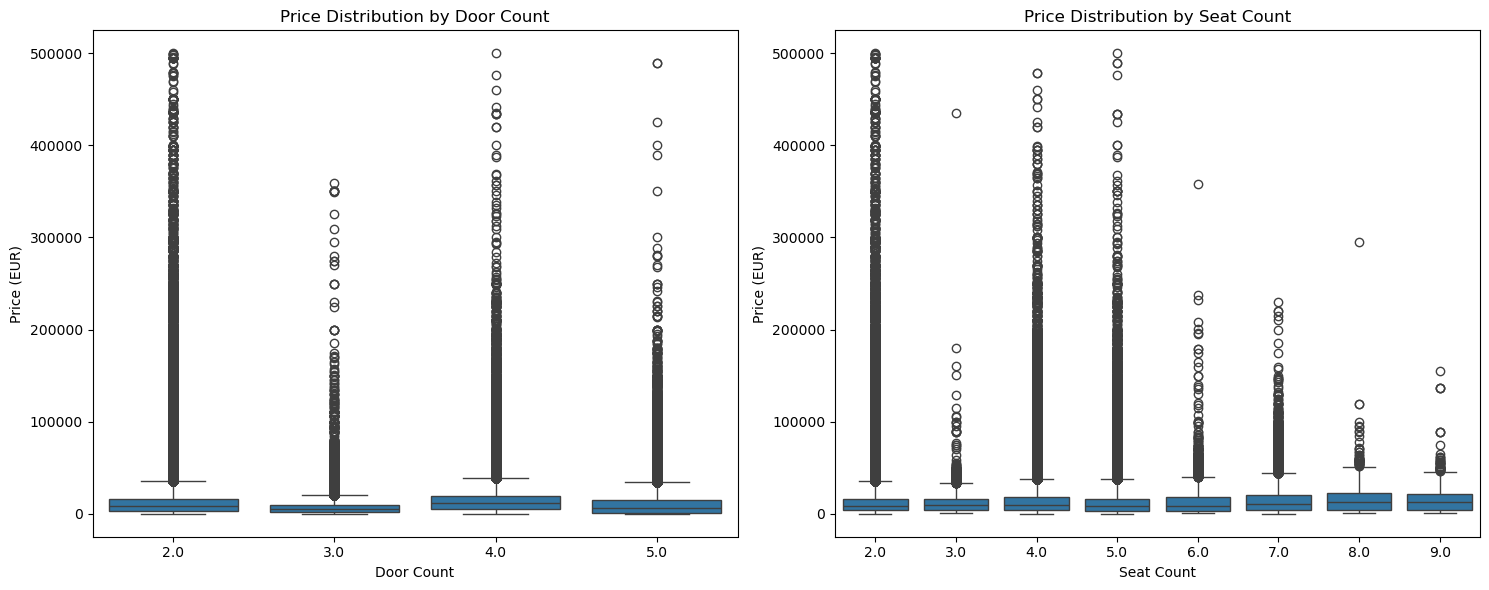

In [55]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.boxplot(x='door_count', y='price_eur', data=df_filtered, ax=axes[0])
axes[0].set_title('Price Distribution by Door Count')
axes[0].set_xlabel('Door Count')
axes[0].set_ylabel('Price (EUR)')

sns.boxplot(x='seat_count', y='price_eur', data=df_filtered, ax=axes[1])
axes[1].set_title('Price Distribution by Seat Count')
axes[1].set_xlabel('Seat Count')
axes[1].set_ylabel('Price (EUR)')

plt.tight_layout()
plt.show()

Brand is a strong indicator of a car's price category. High-end brands consistently stay in the top range, while general consumer brands have a wide spread but stay at lower price levels.

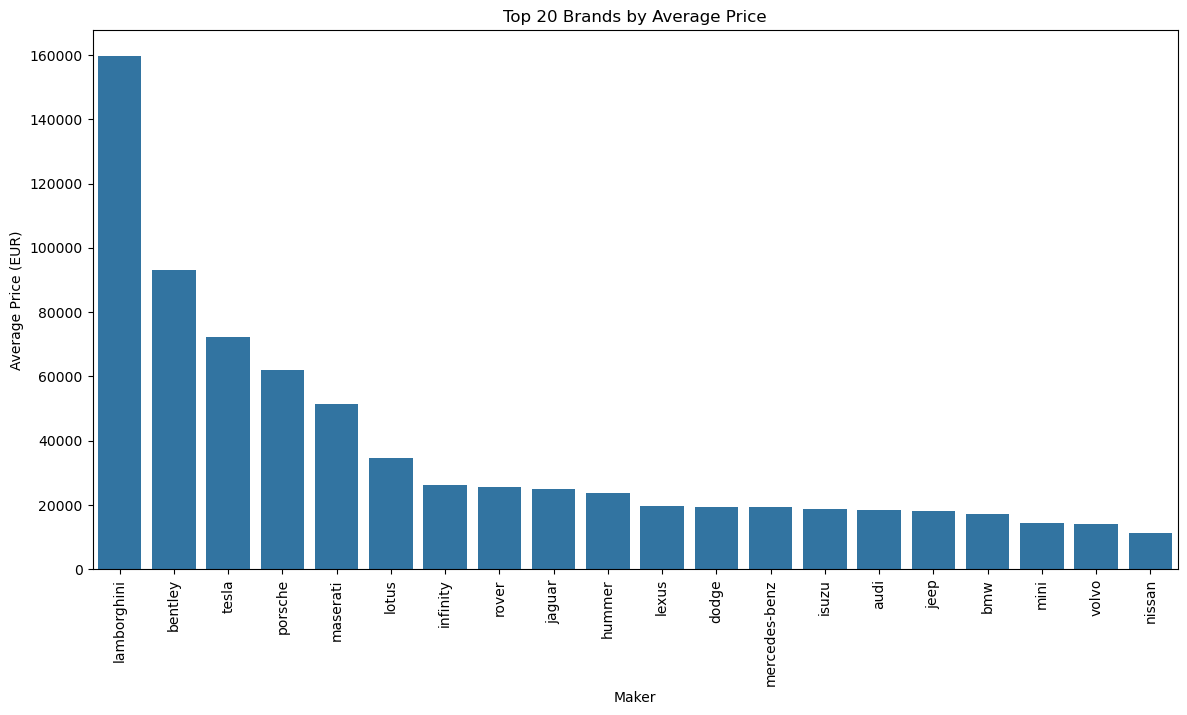

In [47]:
avg_price_per_maker = df_filtered.groupby('maker')['price_eur'].mean().sort_values(ascending=False)

plt.figure(figsize=(14, 7))
sns.barplot(x=avg_price_per_maker.index[:20], y=avg_price_per_maker.values[:20])
plt.xticks(rotation=90)
plt.title('Top 20 Brands by Average Price')
plt.xlabel('Maker')
plt.ylabel('Average Price (EUR)')
plt.show()


In the analysis of the relationship between car color, technical inspection year, and price, the plots show that neither of these factors significantly influences car pricing.

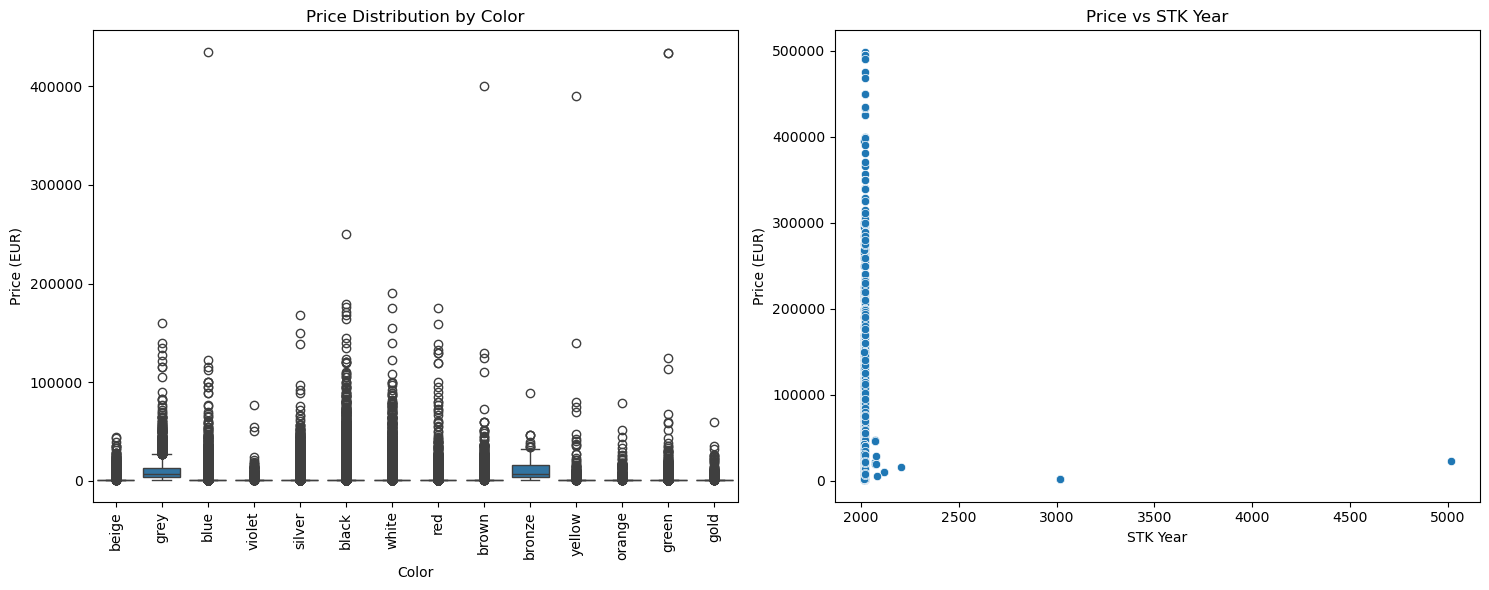

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.boxplot(x='color_slug', y='price_eur', data=df_filtered, ax=axes[0])
axes[0].set_title('Price Distribution by Color')
axes[0].set_xlabel('Color')
axes[0].set_ylabel('Price (EUR)')
axes[0].tick_params(axis='x', rotation=90)

sns.scatterplot(x='stk_year', y='price_eur', data=df_filtered, ax=axes[1])
axes[1].set_title('Price vs STK Year')
axes[1].set_xlabel('STK Year')
axes[1].set_ylabel('Price (EUR)')

plt.tight_layout()
plt.show()


While the countplot shows that the number of cars with gasoline and diesel fuel types are roughly the same, there is a notable difference when we look at the boxplot. The gasoline fuel type exhibits more outliers with higher prices than the diesel fuel type. This indicates that while most gasoline cars are priced similarly to diesel cars, there are some gasoline cars with significantly higher prices that stand out from the general distribution. These could be luxury models, newer cars, or ones with high-end features.

When comparing the two transmission types—manual and automatic—against price,
the countplot shows that there are roughly twice as many manual transmission cars compared to automatic ones. This indicates that manual transmissions are much more common in the dataset. Despite the disparity in counts, the boxplot for manual and automatic transmission types shows very similar price distributions. Both transmission types exhibit a similar range of prices, and their medians are close to each other. This suggests that the transmission type does not have a strong influence on the price of the car.

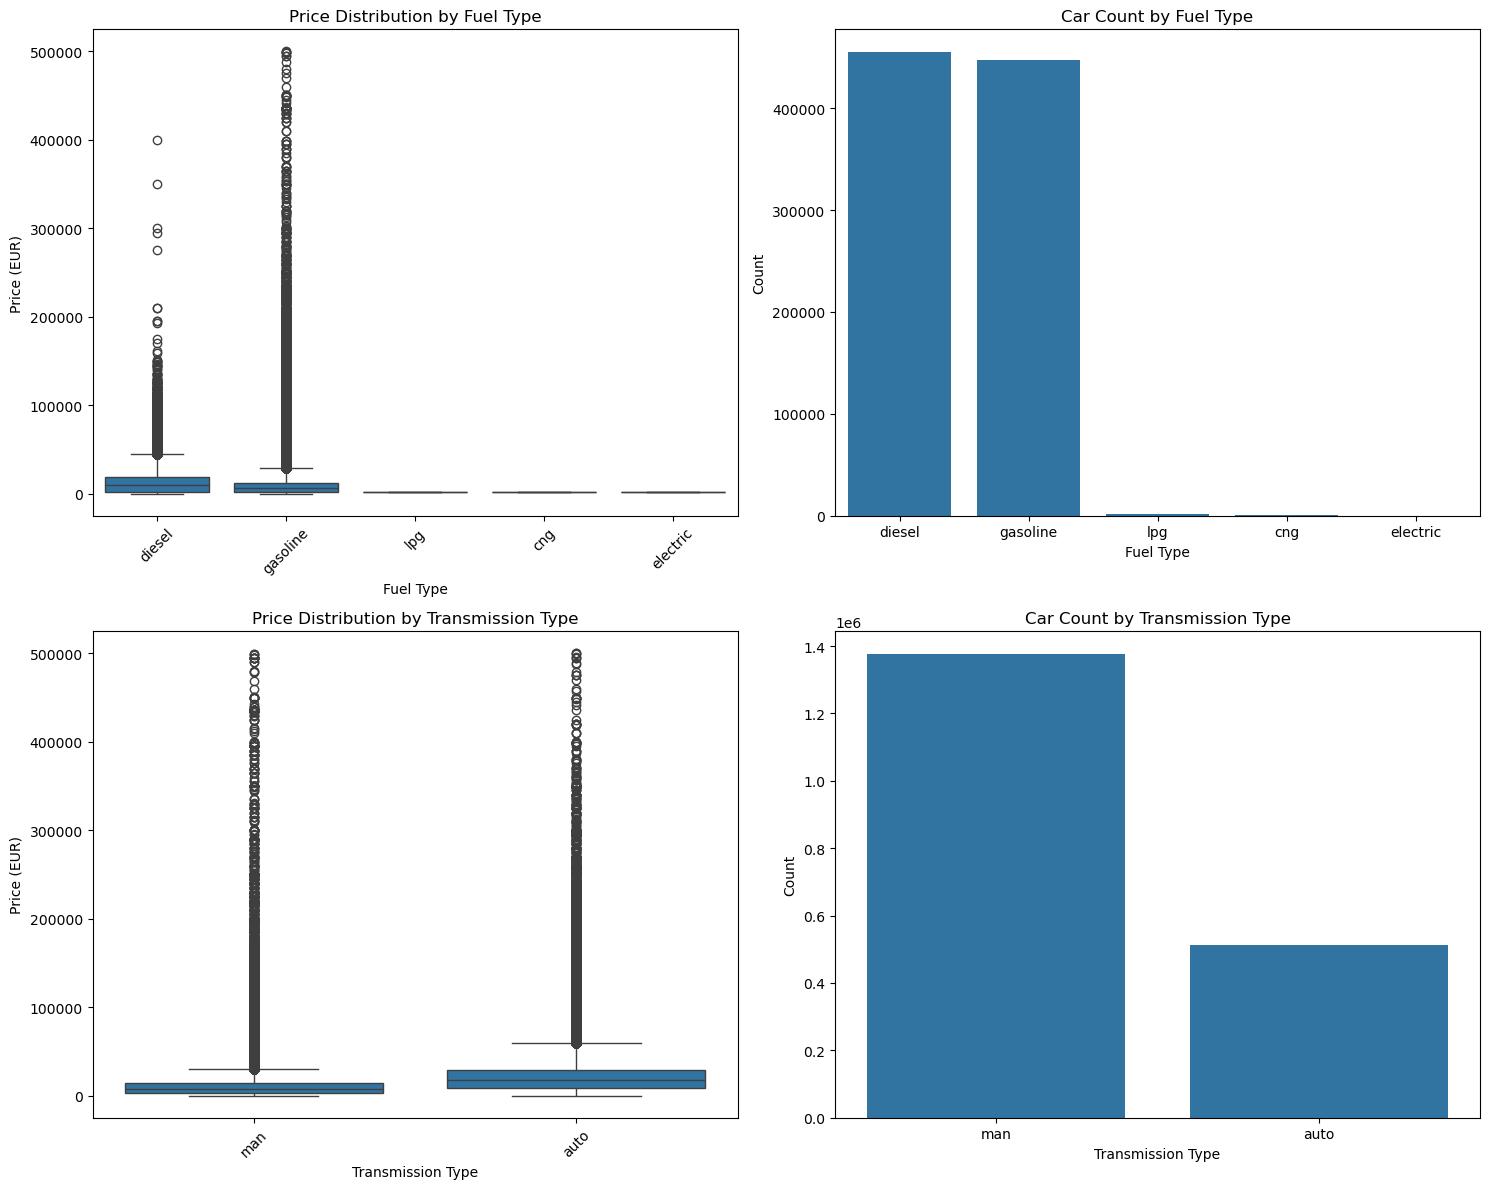

In [60]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

sns.boxplot(x='fuel_type', y='price_eur', data=df_filtered, ax=axes[0, 0])
axes[0, 0].set_title('Price Distribution by Fuel Type')
axes[0, 0].set_xlabel('Fuel Type')
axes[0, 0].set_ylabel('Price (EUR)')
axes[0, 0].tick_params(axis='x', rotation=45)

sns.countplot(x='fuel_type', data=df_filtered, ax=axes[0, 1])
axes[0, 1].set_title('Car Count by Fuel Type')
axes[0, 1].set_xlabel('Fuel Type')
axes[0, 1].set_ylabel('Count')

sns.boxplot(x='transmission', y='price_eur', data=df_filtered, ax=axes[1, 0])
axes[1, 0].set_title('Price Distribution by Transmission Type')
axes[1, 0].set_xlabel('Transmission Type')
axes[1, 0].set_ylabel('Price (EUR)')
axes[1, 0].tick_params(axis='x', rotation=45)

sns.countplot(x='transmission', data=df_filtered, ax=axes[1, 1])
axes[1, 1].set_title('Car Count by Transmission Type')
axes[1, 1].set_xlabel('Transmission Type')
axes[1, 1].set_ylabel('Count')

plt.tight_layout()
plt.show()
